# **About**

## **Libraries**

In [1]:
!pip install scikit-optimize
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.9 MB/s eta 0:00:00


In [2]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, auc, mean_absolute_error, make_scorer
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from skopt.space import Integer, Real, Categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import os

## **Collect Data**

### **Setting Up**

In [3]:
def add_unique_ids(*, original_data, synthetic_data):
    original_copy = original_data.copy()
    synthetic_copy = synthetic_data.copy()

    original_copy["data_id"] = [f"ORIG_{i}" for i in original_copy.index]
    synthetic_copy["data_id"] = [f"SYNTH_{i}" for i in synthetic_copy.index]

    return original_copy, synthetic_copy

### **Original**

In [ ]:
files.upload()

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mysarahmadbhat/lung-cancer
!unzip "./lung-cancer.zip" -d "./datasets"

!rm "./lung-cancer.zip"
!rm "./kaggle.json"

os.rename("./datasets/survey lung cancer.csv", "./datasets/lung_survey_original.csv")

Dataset URL: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer
License(s): CC0-1.0
Archive:  ./lung-cancer.zip
  inflating: ./datasets/survey lung cancer.csv  


In [6]:
lung_original = pd.read_csv("./datasets/lung_survey_original.csv")
lung_original.tail(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


#### **Data Information**

In [7]:
lung_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
print(f"Total missing values: {lung_original.isna().sum().sum()}")
print(f"Total duplicates: {lung_original.duplicated().sum()}")

Total missing values: 0
Total duplicates: 33


In [9]:
lung_original.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### **Synthetics**

In [10]:
files.upload()

!mv "./lung_survey_synthetics.csv" "./datasets/lung_survey_synthetics.csv"

Saving lung_survey_synthetics.csv to lung_survey_synthetics.csv


In [11]:
lung_synthetics = pd.read_csv("./datasets/lung_survey_synthetics.csv")
lung_synthetics.tail(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
797,F,96,1,1,2,2,2,2,1,1,2,1,1,2,1,YES
798,M,89,1,2,1,2,2,1,2,1,2,2,1,2,1,YES
799,F,94,2,1,2,1,1,1,2,1,1,2,2,2,2,YES


#### **Data Information**

In [12]:
lung_synthetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 800 non-null    object
 1   AGE                    800 non-null    int64 
 2   SMOKING                800 non-null    int64 
 3   YELLOW_FINGERS         800 non-null    int64 
 4   ANXIETY                800 non-null    int64 
 5   PEER_PRESSURE          800 non-null    int64 
 6   CHRONIC DISEASE        800 non-null    int64 
 7   FATIGUE                800 non-null    int64 
 8   ALLERGY                800 non-null    int64 
 9   WHEEZING               800 non-null    int64 
 10  ALCOHOL CONSUMING      800 non-null    int64 
 11  COUGHING               800 non-null    int64 
 12  SHORTNESS OF BREATH    800 non-null    int64 
 13  SWALLOWING DIFFICULTY  800 non-null    int64 
 14  CHEST PAIN             800 non-null    int64 
 15  LUNG_CANCER            

In [13]:
print(f"Total missing values: {lung_synthetics.isna().sum().sum()}")
print(f"Total duplicates: {lung_synthetics.duplicated().sum()}")

Total missing values: 0
Total duplicates: 8


In [14]:
lung_synthetics.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000
mean,49.633750,1.412500,1.397500,1.433750,1.421250,1.396250,1.437500,1.41500,1.410000,1.346250,1.43625,1.448750,1.416250,1.447500
std,26.724096,0.492592,0.489687,0.495902,0.494068,0.489423,0.496389,0.49303,0.492141,0.476072,0.49623,0.497678,0.493244,0.497547
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,25.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
50%,52.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
75%,76.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000
max,99.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000


### **Combining**

In [84]:
# x_original = lung_original.drop(columns=["LUNG_CANCER"])
# y_original = lung_original["LUNG_CANCER"]

# x_validation, x_test, y_validation, y_test = train_test_split(
#     x_original, y_original,
#     test_size=0.2,
#     random_state=42,
#     stratify=y_original
# )

validation_data = pd.concat([x_validation, y_validation], axis=1)
# test_data = pd.concat([x_test, y_test], axis=1)

# test_data.to_csv("./datasets/lung_survey_test.csv", index=False)
lung_original.to_csv("./datasets/lung_survey_test.csv", index=False)

# del x_test, y_test, test_data

## **Data Preprocessing**



### **Setting Up**

In [85]:
def format_(*, dataset):
  dataset_copy = dataset.copy()

  dataset_copy.columns = [column.strip().lower().replace(" ", "_") for column in dataset_copy.columns]
  print("Success")

  return dataset_copy

def drop_duplicates_(*, dataset):
  dataset_copy = dataset.copy()
  dataset_copy.drop_duplicates(inplace=True)
  dataset_copy.reset_index(drop=True, inplace=True)
  print("Success")

  print(f"Total duplicates: {dataset_copy.duplicated().sum()}")

  return dataset_copy

def scale(*, dataset, column_):
  dataset_copy = dataset.copy()

  scaler = MinMaxScaler()

  dataset_copy[column_] = scaler.fit_transform(dataset_copy[[column_]])

  print(f"Column {column_} succesfully scaled in the given dataset.")

  return scaler, dataset_copy

def encoding(*, dataset, column_):

  label_encoder = LabelEncoder()

  encoded_column = dataset[column_].copy()
  dataset[column_] = label_encoder.fit_transform(encoded_column)

  print(f"Column {column_} succesfully encoded in the given dataset.")
  return label_encoder, dataset

### **Action from Data Exploration**

In [86]:
lung_explored = lung_synthetics.copy()

lung_explored.drop(
    columns=["GENDER"], inplace=True
)

### **Format Data**

In [87]:
lung_format = lung_explored.copy()

lung_format = format_(dataset=lung_format)

print(lung_format.columns)

Success
Index(['age', 'smoking', 'yellow_fingers', 'anxiety', 'peer_pressure',
       'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')


### **Clean Data**

In [88]:
lung_cleaned = lung_format.copy()

lung_cleaned = drop_duplicates_(dataset=lung_cleaned)

Success
Total duplicates: 0


### **Scaling**

In [89]:
lung_scaled = lung_cleaned.copy()

scaler, lung_scaled = scale(dataset=lung_scaled, column_="age")

lung_scaled[lung_scaled.drop(columns=["age", "lung_cancer"]).columns] = lung_scaled[
    lung_scaled.drop(columns=["age", "lung_cancer"]).columns
] - 1

Column age succesfully scaled in the given dataset.


### **Encoding**

In [90]:
lung_encoded = lung_scaled.copy()

label_encoder, lung_encoded = encoding(dataset=lung_encoded, column_="lung_cancer")

Column lung_cancer succesfully encoded in the given dataset.


In [91]:
lung_encoded.tail(3)

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
779,0.969388,0,0,1,1,1,1,0,0,1,0,0,1,0,1
780,0.897959,0,1,0,1,1,0,1,0,1,1,0,1,0,1
781,0.948980,1,0,1,0,0,0,1,0,0,1,1,1,1,1


## **Data Exploration**

### **Setting Up**

In [92]:
plt.style.use("dark_background")

In [93]:
def show_distribution(*, dataset, column_):
    if column_ not in dataset.columns:
        print(f"Error: The column with the name \"{column_}\" is not found in the given dataset.")
        return

    value_counts = dataset[column_].value_counts()

    plt.figure(figsize=(8, 4.8))
    value_counts.plot(kind='bar')

    plt.title(f"Category distribution on the column: \"{column_.capitalize()}\"")
    plt.xlabel(column_.capitalize())
    plt.ylabel("Number of occurrences")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def create_boxplot(*, dataset, column_):
    plt.figure(figsize=(8, 5))
    dataset[[column_]].boxplot()

    plt.grid(linestyle='--', alpha=0.5)
    plt.show()

def visualize_scatter_plot(*, dataset, feature_a, feature_b) -> None:
  if not isinstance(dataset, pd.DataFrame):
    raise TypeError("Parameter 'dataset' must be a Pandas DataFrame.")

  if feature_a not in dataset.columns:
    raise ValueError(f"Feature '{feature_a}' not found in dataset.")
  if feature_b not in dataset.columns:
    raise ValueError(f"Feature '{feature_b}' not found in dataset.")

  plt.figure(figsize=(8, 6))
  plt.scatter(dataset[feature_a], dataset[feature_b], alpha=0.7)

  plt.xlabel(feature_a)
  plt.ylabel(feature_b)
  plt.title(f'Scatter Plot between {feature_a} and {feature_b}')
  plt.grid(True)

  plt.show()

def visualize_correlation_matrix(*, dataset):
  numeric_dataframe = dataset.select_dtypes(include=np.number)

  if numeric_dataframe.empty:
    print("No numeric columns found in the DataFrame to calculate correlation.")
    return
  if numeric_dataframe.shape[1] < 2:
    print("At least two numeric columns are required to calculate correlation.")
    return

  correlation_matrix = numeric_dataframe.corr()
  labels = correlation_matrix.columns

  fig, ax = plt.subplots(figsize=(10, 8))

  im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

  cbar = ax.figure.colorbar(im, ax=ax)
  cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

  ax.set_xticks(np.arange(len(labels)))
  ax.set_yticks(np.arange(len(labels)))
  ax.set_xticklabels(labels)
  ax.set_yticklabels(labels)

  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
           rotation_mode="anchor")

  for i in range(len(labels)):
      for j in range(len(labels)):
          text_color = "white" if abs(correlation_matrix.iloc[i, j]) > 0.6 else "black"
          text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                         ha="center", va="center", color=text_color)

  ax.set_title("Correlation Matrix of Numeric Features", fontsize=16)
  fig.tight_layout()
  plt.show()

In [94]:
show_distribution(dataset=lung_scaled, column_="gender")

Error: The column with the name "gender" is not found in the given dataset.


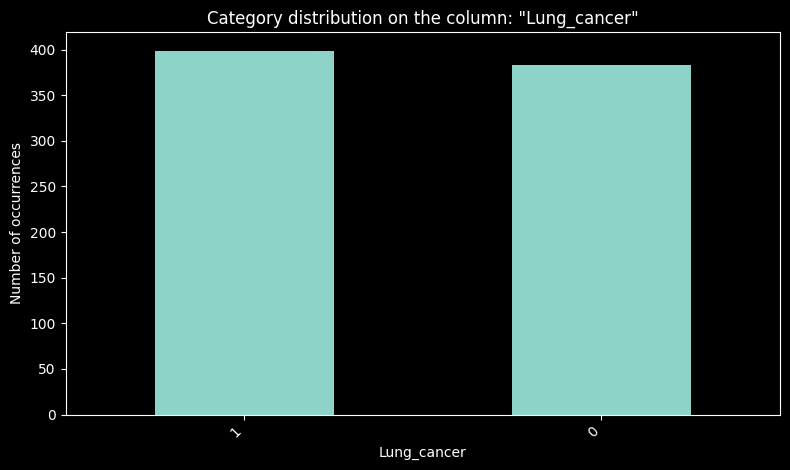

In [95]:
show_distribution(dataset=lung_encoded, column_="lung_cancer")

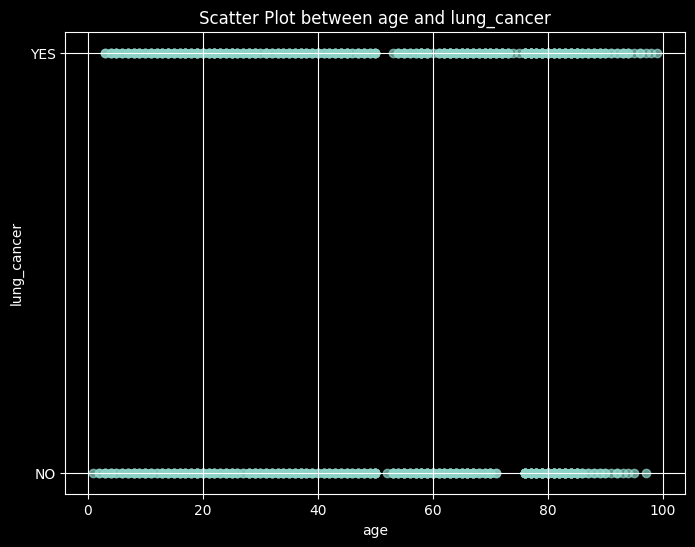

In [96]:
visualize_scatter_plot(dataset=lung_cleaned, feature_a="age", feature_b="lung_cancer")

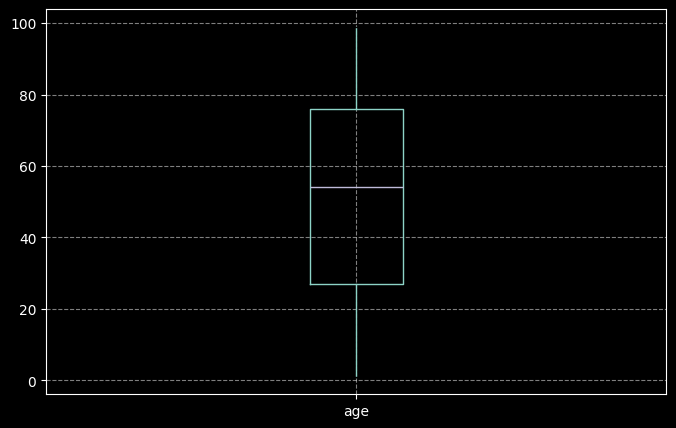

In [97]:
create_boxplot(dataset=lung_cleaned, column_="age")

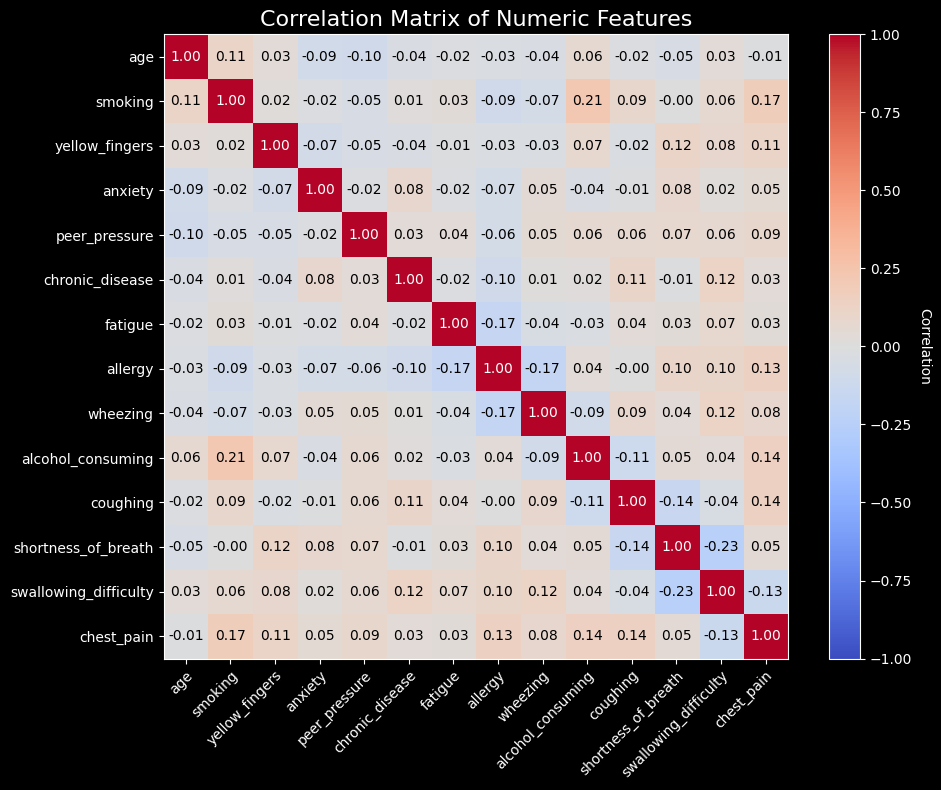

In [98]:
visualize_correlation_matrix(dataset=lung_cleaned)

## **Developing Model**

### **Data Splitting**

In [99]:
x_train = lung_encoded.drop(columns=["lung_cancer"])
y_train = lung_encoded["lung_cancer"]

### **Training**

In [100]:
def tune(*, x_train, y_train, n_iter=30, cv=5):
    search_space = {
        "n_estimators": (50, 500),
        "max_depth": (3, 30),
        "min_samples_split": (2, 20),
        "min_samples_leaf": (1, 10),
        "max_features": (0.1, 1.0),
        "bootstrap": [True, False],
        "criterion": ["gini", "entropy"]
    }

    opt = BayesSearchCV(
        RandomForestClassifier(random_state=42),
        search_space,
        n_iter=n_iter,
        cv=StratifiedKFold(cv, shuffle=True, random_state=42),
        scoring=make_scorer(accuracy_score),
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    opt.fit(x_train, y_train)

    return opt.best_params_

def train_tuned(*, best_parameters, x_train, y_train):
    parameters = best_parameters.copy()

    model = RandomForestClassifier(
        **parameters,
        random_state=42,
        n_jobs=-1
    )

    model.fit(x_train, y_train)
    return model

def evaluate_model(*, model, features, label):
    y_predict = model.predict(features)

    return {
        "accuracy": accuracy_score(label, y_predict),
        "classification_report": classification_report(label, y_predict),
        "confusion_matrix": confusion_matrix(label, y_predict),
        "y_true": label,
        "y_predict": y_predict,
    }

def plot_confusion_matrix(*, y_true, y_predict, class_names):
    cm = confusion_matrix(y_true, y_predict)

    plt.figure(figsize=(6, 6))

    sns.heatmap(
      cm, annot=True, fmt='d', cmap="Blues",
      xticklabels=class_names,
      yticklabels=class_names,
      cbar=False
    )

    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title("Confusion Matrix", fontsize=16)

    plt.xticks(rotation=45, ha="right", fontsize=14)
    plt.yticks(rotation=0, fontsize=14)

    plt.tight_layout()
    plt.show()

def show_misclassified_samples(*, y_predict, y_true, data_ids):
    results = pd.DataFrame({
        "actual": y_true,
        "predicted": y_predict,
    })

    misclassified = results[results["actual"] != results["predicted"]]

    return misclassified.reset_index(drop=True)

In [101]:
best_parameters = tune(x_train=x_train, y_train=y_train)

for parameter in best_parameters:
  print(f"{parameter.capitalize()}: {best_parameters[parameter]}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [102]:
model = train_tuned(best_parameters=best_parameters, x_train=x_train, y_train=y_train)

trained_evaluation_result = evaluate_model(model=model, features=x_train, label=y_train)

print(f"Model evaluation on training data\n{'-'*53}")
print(f"Accuracy: {trained_evaluation_result['accuracy']}\n{'-'*53}")
print(f"Classification Report:\n{trained_evaluation_result['classification_report']}")

Model evaluation on training data
-----------------------------------------------------
Accuracy: 0.9641943734015346
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       383
           1       0.94      0.99      0.97       399

    accuracy                           0.96       782
   macro avg       0.97      0.96      0.96       782
weighted avg       0.97      0.96      0.96       782



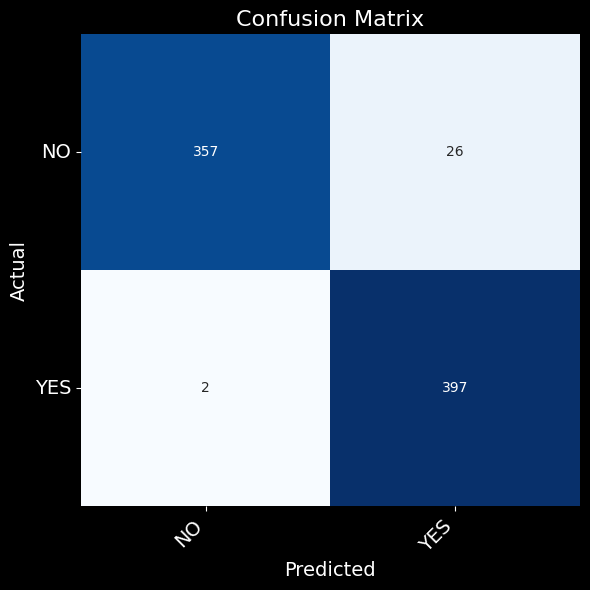

In [103]:
plot_confusion_matrix(
    y_true=trained_evaluation_result["y_true"],
    y_predict=trained_evaluation_result["y_predict"],
    class_names=label_encoder.classes_
)

In [104]:
# show_misclassified_samples(
#     y_predict=trained_evaluation_result["y_predict"],
#     y_true=trained_evaluation_result["y_true"],
#     data_ids=data_ids
# )

In [105]:
os.makedirs("models", exist_ok=True)
joblib.dump(model, "./models/lung_cancer_detector.joblib")

['./models/lung_cancer_detector.joblib']

## **Inference**

In [106]:
loaded_model = joblib.load("./models/lung_cancer_detector.joblib")

### **Collect Data**

In [107]:
test_data = pd.read_csv("./datasets/lung_survey_test.csv")

### **Preprocessing**

#### **Action from Data Exploration**

In [108]:
lung_explored_test = test_data.copy()

lung_explored_test.drop(
    columns=["GENDER"], inplace=True
)

#### **Format Data**

In [109]:
lung_format_test = lung_explored_test.copy()

lung_format_test = format_(dataset=lung_format_test)

print(lung_format.columns)

Success
Index(['age', 'smoking', 'yellow_fingers', 'anxiety', 'peer_pressure',
       'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')


#### **Clean Data**

In [110]:
lung_cleaned_test = lung_format_test.copy()

lung_cleaned_test = drop_duplicates_(dataset=lung_cleaned_test)

Success
Total duplicates: 0


#### **Scaling**

In [111]:
lung_scaled_test = lung_cleaned_test.copy()

lung_scaled_test["age"] = scaler.transform(lung_scaled_test[["age"]])

#### **Encoding**

In [112]:
lung_encoded_test = lung_scaled_test.copy()

label_encoder, lung_encoded_test = encoding(dataset=lung_scaled_test, column_="lung_cancer")

Column lung_cancer succesfully encoded in the given dataset.


### **Testing**

In [113]:
x_test = lung_scaled_test.drop(columns=["lung_cancer"])
y_test = lung_scaled_test["lung_cancer"]

In [114]:
tested_evaluation_result = evaluate_model(model=model, features=x_test, label=y_test)

print(f"Model evaluation on testing data\n{'-'*53}")
print(f"Accuracy: {tested_evaluation_result['accuracy']}\n{'-'*53}")
print(f"Classification Report:\n{tested_evaluation_result['classification_report']}")

Model evaluation on testing data
-----------------------------------------------------
Accuracy: 0.864963503649635
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.86      1.00      0.93       237

    accuracy                           0.86       274
   macro avg       0.43      0.50      0.46       274
weighted avg       0.75      0.86      0.80       274



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


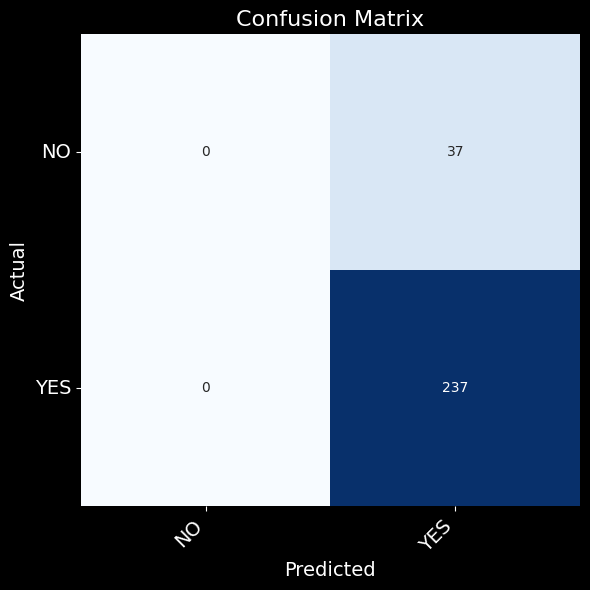

In [115]:
plot_confusion_matrix(
    y_true=tested_evaluation_result["y_true"],
    y_predict=tested_evaluation_result["y_predict"],
    class_names=label_encoder.classes_
)
